In [2]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import geopandas as gpd
from shapely.geometry import shape


KeyboardInterrupt: 

In [ ]:
cwd = os.getcwd()
data_path = "/../raw_data/train_timeseries/train_timeseries.csv"
cwd

In [ ]:
raw_train_data = pd.read_csv(cwd+data_path)
fips_dict = pd.read_csv("../raw_data/fips_dict.csv")
fips_to_name = pd.read_csv('../raw_data/ZIP-COUNTY-FIPS_2017-06.csv')
fips_dict

In [ ]:
raw_train_data["date"] = pd.to_datetime(raw_train_data["date"],format="%Y-%m-%d")

In [ ]:
small_df = raw_train_data[raw_train_data["date"] >= '2015-01-01']

In [ ]:
small_df["score"].isna().sum()/len(small_df)

In [ ]:
#x= some unique value
smaller_df = small_df[small_df["date"] >= '2016-06-01']

In [ ]:
smaller_df["fips"]

In [ ]:
FIPS_dict.rename(columns={"STCOUNTYFP":"fips"},inplace=True)

In [ ]:
FIPS_dict.drop(columns="ZIP")

In [ ]:
merged_df = pd.merge(smaller_df,FIPS_dict,on="fips",how="inner")

In [ ]:
merged_df.groupby("STATE").count().sort_values("CLASSFP")

In [ ]:
sns.countplot(data=merged_df,x="STATE")

In [ ]:
sns.countplot(data=smaller_df,x="fips")

In [ ]:
sns.countplot(data=smaller_df,x="date")

In [ ]:
small_df["date"].unique()

In [20]:
small_df[small_df["fips"] == 27095]["date"].nunique()

731

In [21]:
small_df["fips"].unique()

array([ 1001,  1003,  1005, ..., 56039, 56041, 56043])

In [22]:
#N unique dates per fips
n_obs = []
for fips in raw_train_data["fips"].unique():
    n_obs.append(raw_train_data[raw_train_data["fips"] == fips]["date"].nunique())




In [23]:
x = np.array(n_obs)
np.unique(x)

array([6210])

In [24]:
#N unique fips per date

n_obs_2 = []
for dates in raw_train_data["date"].unique():
    n_obs_2.append(raw_train_data[raw_train_data["date"] == dates]["fips"].nunique())


In [25]:
x_2 = np.array(n_obs_2)
np.unique(x_2)

array([3108])

In [26]:
#create map showing dist of drought class over fips,time

In [27]:
#represent fips by lat/long

In [28]:
merged_df

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,ZIP,COUNTYNAME,STATE,CLASSFP
0,1001,2016-06-01,3.17,99.95,15.20,26.65,20.53,20.53,32.53,21.46,...,1.29,2.34,3.41,0.87,2.54,NaN,36003,Autauga County,AL,H1
1,1001,2016-06-01,3.17,99.95,15.20,26.65,20.53,20.53,32.53,21.46,...,1.29,2.34,3.41,0.87,2.54,NaN,36006,Autauga County,AL,H1
2,1001,2016-06-01,3.17,99.95,15.20,26.65,20.53,20.53,32.53,21.46,...,1.29,2.34,3.41,0.87,2.54,NaN,36067,Autauga County,AL,H1
3,1001,2016-06-01,3.17,99.95,15.20,26.65,20.53,20.53,32.53,21.46,...,1.29,2.34,3.41,0.87,2.54,NaN,36066,Autauga County,AL,H1
4,1001,2016-06-01,3.17,99.95,15.20,26.65,20.53,20.53,32.53,21.46,...,1.29,2.34,3.41,0.87,2.54,NaN,36703,Autauga County,AL,H1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11165873,56043,2016-12-29,0.00,83.75,1.59,-7.96,-13.30,-13.03,0.42,-14.51,...,4.22,6.56,10.07,3.20,6.87,NaN,82442,Washakie County,WY,H1
11165874,56043,2016-12-30,1.22,82.49,2.63,-2.94,-7.40,-7.33,3.76,-6.86,...,5.35,7.28,10.12,3.24,6.89,NaN,82401,Washakie County,WY,H1
11165875,56043,2016-12-30,1.22,82.49,2.63,-2.94,-7.40,-7.33,3.76,-6.86,...,5.35,7.28,10.12,3.24,6.89,NaN,82442,Washakie County,WY,H1
11165876,56043,2016-12-31,0.44,82.19,1.75,-7.56,-11.98,-11.82,-0.95,-11.61,...,3.06,3.37,5.26,0.66,4.60,NaN,82401,Washakie County,WY,H1


In [30]:
lat_long_dict = counties_dict[["NAMELSAD","Geo Point","STUSAB","Geo Shape"]]

In [31]:
lat_long_dict["lat_long"] = lat_long_dict["Geo Point"].transform(lambda x: ast.literal_eval(x))


/tmp/ipykernel_1115/1634156569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_long_dict["lat_long"] = lat_long_dict["Geo Point"].transform(lambda x: ast.literal_eval(x))


In [32]:
lat_long_dict.drop(columns="Geo Point",inplace=True)


/home/jackhooper/.pyenv/versions/droughts/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
lat_long_dict.rename(columns={"NAMELSAD":"COUNTYNAME"},inplace=True)
lat_long_dict.rename(columns={"STUSAB":"STATE"},inplace=True)

/home/jackhooper/.pyenv/versions/droughts/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [34]:
lat_long_dict["COUNTYNAME"].replace("Doña Ana County","Dona Ana County",inplace=True)
lat_long_dict["COUNTYNAME"].replace("LaSalle Parish","La Salle Parish",inplace=True)
lat_long_dict[lat_long_dict.COUNTYNAME.str.contains("Ana")]

/home/jackhooper/.pyenv/versions/droughts/lib/python3.8/site-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,COUNTYNAME,STATE,Geo Shape,lat_long
850,Dona Ana County,NM,"{""type"": ""Polygon"", ""coordinates"": [[[-107.298...","(32.3526480947, -106.832721302)"


In [35]:
new_merged_df = pd.merge(merged_df,lat_long_dict,on=["COUNTYNAME","STATE"],how="left")

In [36]:
new_merged_df[new_merged_df.lat_long.isnull()]["COUNTYNAME"].unique()


array([], dtype=object)

In [37]:
new_merged_df

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,ZIP,COUNTYNAME,STATE,CLASSFP,Geo Shape,lat_long
0,1001,2016-06-01,3.17,99.95,15.20,26.65,20.53,20.53,32.53,21.46,...,3.41,0.87,2.54,NaN,36003,Autauga County,AL,H1,"{""type"": ""Polygon"", ""coordinates"": [[[-86.9030...","(32.5349201866, -86.642749235)"
1,1001,2016-06-01,3.17,99.95,15.20,26.65,20.53,20.53,32.53,21.46,...,3.41,0.87,2.54,NaN,36006,Autauga County,AL,H1,"{""type"": ""Polygon"", ""coordinates"": [[[-86.9030...","(32.5349201866, -86.642749235)"
2,1001,2016-06-01,3.17,99.95,15.20,26.65,20.53,20.53,32.53,21.46,...,3.41,0.87,2.54,NaN,36067,Autauga County,AL,H1,"{""type"": ""Polygon"", ""coordinates"": [[[-86.9030...","(32.5349201866, -86.642749235)"
3,1001,2016-06-01,3.17,99.95,15.20,26.65,20.53,20.53,32.53,21.46,...,3.41,0.87,2.54,NaN,36066,Autauga County,AL,H1,"{""type"": ""Polygon"", ""coordinates"": [[[-86.9030...","(32.5349201866, -86.642749235)"
4,1001,2016-06-01,3.17,99.95,15.20,26.65,20.53,20.53,32.53,21.46,...,3.41,0.87,2.54,NaN,36703,Autauga County,AL,H1,"{""type"": ""Polygon"", ""coordinates"": [[[-86.9030...","(32.5349201866, -86.642749235)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11165873,56043,2016-12-29,0.00,83.75,1.59,-7.96,-13.30,-13.03,0.42,-14.51,...,10.07,3.20,6.87,NaN,82442,Washakie County,WY,H1,"{""type"": ""Polygon"", ""coordinates"": [[[-107.633...","(43.9049970086, -107.68286072)"
11165874,56043,2016-12-30,1.22,82.49,2.63,-2.94,-7.40,-7.33,3.76,-6.86,...,10.12,3.24,6.89,NaN,82401,Washakie County,WY,H1,"{""type"": ""Polygon"", ""coordinates"": [[[-107.633...","(43.9049970086, -107.68286072)"
11165875,56043,2016-12-30,1.22,82.49,2.63,-2.94,-7.40,-7.33,3.76,-6.86,...,10.12,3.24,6.89,NaN,82442,Washakie County,WY,H1,"{""type"": ""Polygon"", ""coordinates"": [[[-107.633...","(43.9049970086, -107.68286072)"
11165876,56043,2016-12-31,0.44,82.19,1.75,-7.56,-11.98,-11.82,-0.95,-11.61,...,5.26,0.66,4.60,NaN,82401,Washakie County,WY,H1,"{""type"": ""Polygon"", ""coordinates"": [[[-107.633...","(43.9049970086, -107.68286072)"


In [38]:
counties_dict["NAMELSAD"].unique()

counties_dict[counties_dict.NAMELSAD.str.contains("Salle")]

,Geo Point,Geo Shape,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,STUSAB,LSAD,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,STATE_NAME,COUNTYFP NOZERO
194,"31.6767316888,-92.1604365033","{""type"": ""Polygon"", ""coordinates"": [[[-92.3126...",22,59,558049,22059,LaSalle,LaSalle Parish,LA,15,...,NaN,NaN,NaN,A,1617925445,97664170,31.680083,-92.161596,Louisiana,59
2390,"28.3450693013,-99.0996626872","{""type"": ""Polygon"", ""coordinates"": [[[-99.3937...",48,283,1383924,48283,La Salle,La Salle County,TX,6,...,NaN,NaN,NaN,A,3850545737,19503739,28.351098,-99.096774,Texas,283
2605,"41.3440027805,-88.8859379256","{""type"": ""Polygon"", ""coordinates"": [[[-89.1664...",17,99,422247,17099,LaSalle,LaSalle County,IL,6,...,176.0,36837.0,NaN,A,2940070811,33698037,41.343341,-88.885931,Illinois,99


In [39]:
pre_geo_df = new_merged_df[new_merged_df["date"] == "2016-12-27"]
pre_geo_df = pre_geo_df[["Geo Shape","lat_long","COUNTYNAME","STATE","fips","date","score"]]
pre_geo_df.rename(columns={"Geo Shape":"geo_shape"},inplace=True)


In [40]:
pre_geo_df["geom"] = pre_geo_df["geo_shape"].transform(lambda x: shape(ast.literal_eval((x))))

In [41]:
pre_geo_df[ pre_geo_df["geom"].isnull()]

,geo_shape,lat_long,COUNTYNAME,STATE,fips,date,score,geom


In [42]:
geo_df = gpd.GeoDataFrame(pre_geo_df,geometry=pre_geo_df["geom"])


<AxesSubplot:>

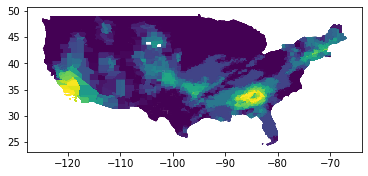

In [43]:
geo_df.plot(column='score')

In [44]:
pre_geo_df.rename(columns={"Geo Shape":"geo_shape"},inplace=True)

In [45]:
pre_geo_df

,geo_shape,lat_long,COUNTYNAME,STATE,fips,date,score,geom,geometry
2717,"{""type"": ""Polygon"", ""coordinates"": [[[-86.9030...","(32.5349201866, -86.642749235)",Autauga County,AL,1001,2016-12-27,3.0928,"POLYGON ((-86.90309600000001 32.540626, -86.90...","POLYGON ((-86.90310 32.54063, -86.90311 32.540..."
2718,"{""type"": ""Polygon"", ""coordinates"": [[[-86.9030...","(32.5349201866, -86.642749235)",Autauga County,AL,1001,2016-12-27,3.0928,"POLYGON ((-86.90309600000001 32.540626, -86.90...","POLYGON ((-86.90310 32.54063, -86.90311 32.540..."
2719,"{""type"": ""Polygon"", ""coordinates"": [[[-86.9030...","(32.5349201866, -86.642749235)",Autauga County,AL,1001,2016-12-27,3.0928,"POLYGON ((-86.90309600000001 32.540626, -86.90...","POLYGON ((-86.90310 32.54063, -86.90311 32.540..."
2720,"{""type"": ""Polygon"", ""coordinates"": [[[-86.9030...","(32.5349201866, -86.642749235)",Autauga County,AL,1001,2016-12-27,3.0928,"POLYGON ((-86.90309600000001 32.540626, -86.90...","POLYGON ((-86.90310 32.54063, -86.90311 32.540..."
2721,"{""type"": ""Polygon"", ""coordinates"": [[[-86.9030...","(32.5349201866, -86.642749235)",Autauga County,AL,1001,2016-12-27,3.0928,"POLYGON ((-86.90309600000001 32.540626, -86.90...","POLYGON ((-86.90310 32.54063, -86.90311 32.540..."
...,...,...,...,...,...,...,...,...,...
11165419,"{""type"": ""Polygon"", ""coordinates"": [[[-110.606...","(41.287491921, -110.547561693)",Uinta County,WY,56041,2016-12-27,0.1023,"POLYGON ((-110.606794 40.996255, -110.606887 4...","POLYGON ((-110.60679 40.99625, -110.60689 40.9..."
11165420,"{""type"": ""Polygon"", ""coordinates"": [[[-110.606...","(41.287491921, -110.547561693)",Uinta County,WY,56041,2016-12-27,0.1023,"POLYGON ((-110.606794 40.996255, -110.606887 4...","POLYGON ((-110.60679 40.99625, -110.60689 40.9..."
11165421,"{""type"": ""Polygon"", ""coordinates"": [[[-110.606...","(41.287491921, -110.547561693)",Uinta County,WY,56041,2016-12-27,0.1023,"POLYGON ((-110.606794 40.996255, -110.606887 4...","POLYGON ((-110.60679 40.99625, -110.60689 40.9..."
11165868,"{""type"": ""Polygon"", ""coordinates"": [[[-107.633...","(43.9049970086, -107.68286072)",Washakie County,WY,56043,2016-12-27,0.0000,"POLYGON ((-107.63349 43.64634, -107.633522 43....","POLYGON ((-107.63349 43.64634, -107.63352 43.6..."


In [46]:
fips_dict = pre_geo_df[["lat_long","COUNTYNAME","STATE","fips","geom"]]

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
fips_dict.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [ ]:
pd.merge(smaller_df,fips_dict, on=["COUNTYNAME","STATE"], how=inner)

In [ ]:
filenames = []
for date in geo_df["date"].unique():
    # plot the line chart
    geo_df[geo_df["date"]==date].plot(column='score')
    
    # create file name and append it to a list
    filename = f'date.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
# build gif
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


In [ ]:
small_df

In [174]:
fips_dict

,COUNTYNAME,STATE,fips,geom,lat_long
0,Autauga County,AL,1001,"POLYGON ((-86.90309600000001 32.540626, -86.90...","(32.5349201866, -86.642749235)"
1,Baldwin County,AL,1003,"POLYGON ((-87.990684 30.55549, -87.990506 30.5...","(30.6609696648, -87.7498400784)"
2,Barbour County,AL,1005,"POLYGON ((-85.42981899999999 32.045983, -85.42...","(31.8696032448, -85.3931969755)"
3,Bibb County,AL,1007,"POLYGON ((-87.312265 33.086219, -87.312179 33....","(32.9986442965, -87.1264391014)"
4,Blount County,AL,1009,"POLYGON ((-86.749188 33.997596, -86.7490229999...","(33.9808673856, -86.5673709608)"
...,...,...,...,...,...
3105,Teton County,WY,56039,"POLYGON ((-111.049091 44.132368, -111.049093 4...","(43.9346374164, -110.589809669)"
3106,Uinta County,WY,56041,"POLYGON ((-110.606794 40.996255, -110.606887 4...","(41.287491921, -110.547561693)"
3107,Washakie County,WY,56043,"POLYGON ((-107.63349 43.64634, -107.633522 43....","(43.9049970086, -107.68286072)"
3108,Bedford County,VA,51515,"POLYGON ((-79.63420600000001 37.457021, -79.63...","(37.3151524068,-79.5241721318)"


In [1]:
small_df.fips.unique()

NameError: name 'small_df' is not defined

In [ ]:
fips_dict.fips.unique()